In [1]:
import pypsa

import pandas as pd

idx = pd.IndexSlice

import matplotlib.pyplot as plt

from pyomo.environ import Constraint

%matplotlib inline

In [2]:
country_to_code = {
'EU28' : 'EU',
'EA19' : 'EA',
'Belgium' : 'BE',
'Bulgaria' : 'BG',
'Czech Republic' : 'CZ',
'Denmark' : 'DK',
'Germany' : 'DE',
'Estonia' : 'EE',
'Ireland' : 'IE',
'Greece' : 'GR',
'Spain' : 'ES',
'France' : 'FR',
'Croatia' : 'HR',
'Italy' : 'IT',
'Cyprus' : 'CY',
'Latvia' : 'LV',
'Lithuania' : 'LT',
'Luxembourg' : 'LU',
'Hungary' : 'HU',
'Malta' : 'MA',
'Netherlands' : 'NL',
'Austria' : 'AT',
'Poland' : 'PL',
'Portugal' : 'PT',
'Romania' : 'RO',
'Slovenia' : 'SI',
'Slovakia' : 'SK',
'Finland' : 'FI',
'Sweden' : 'SE',
'United Kingdom' : 'GB',
'Iceland' : 'IS',
'Norway' : 'NO',
'Montenegro' : 'ME',
'FYR of Macedonia' : 'MK',
'Albania' : 'AL',
'Serbia' : 'RS',
'Turkey' : 'TU',
'Bosnia and Herzegovina' : 'BA',
'Kosovo\n(UNSCR 1244/99)' : 'KO',  #2017 version
'Kosovo\n(under United Nations Security Council Resolution 1244/99)' : 'KO',  #2016 version
'Moldova' : 'MO',
'Ukraine' : 'UK',
'Switzerland' : 'CH',
}

code_to_country = { v : k for k,v in country_to_code.items()}

In [10]:
scenario = "2050-steel_tanks"

filename = "summary-181002.csv"

results = pd.read_csv(filename,index_col=0,header=[0,1])

results = results[scenario]
results

country,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,...,LV,MK,NL,NO,PL,PT,RO,SE,SI,SK
cost,116.187829,123.840101,115.123914,155.544992,107.587502,111.559619,146.754289,124.765890,118.702132,81.109792,...,118.525856,166.506978,121.742714,92.358289,108.981989,86.113440,108.731788,117.700157,166.245731,173.243476
wind,5.092499,5.803478,3.150090,6.085726,1.341266,5.620507,8.004042,6.114024,6.719082,4.313403,...,5.417752,2.875211,5.826220,4.641869,6.663976,2.998396,5.502792,5.983553,4.152284,4.758231
cost-wind,52.634466,59.982924,32.558335,62.900152,13.862907,58.091795,82.727260,63.192628,69.446314,44.581975,...,55.996178,29.717276,60.217974,47.976898,68.876757,30.990481,56.875129,61.844120,42.916702,49.179576
solar,6.736645,3.913380,6.078613,12.113911,8.608528,2.840457,3.492573,2.192576,2.423099,3.729918,...,3.612247,17.921159,2.486955,3.973081,1.524801,5.600008,1.642319,1.580813,15.489889,14.693087
cost-solar,27.527288,15.990858,24.838434,49.499876,35.176175,11.606678,14.271356,8.959308,9.901268,15.241194,...,14.760367,73.229459,10.162200,16.234807,6.230645,22.882759,6.710846,6.459519,63.294801,60.038910
charger,0.805263,0.235055,0.675839,1.786523,3.132362,0.227392,0.237404,0.122999,0.135436,0.789345,...,0.335130,3.159244,0.054202,0.481022,0.087166,1.226355,0.041482,0.100072,3.592202,2.129637
cost-charger,1.290379,0.376659,1.082987,2.862781,5.019396,0.364380,0.380424,0.197097,0.217027,1.264871,...,0.537024,5.062472,0.086854,0.770805,0.139678,1.965151,0.066472,0.160358,5.756258,3.412598
elec,0.794663,1.190881,1.150973,0.873410,0.777549,1.087915,1.526135,1.378360,1.387707,0.443566,...,1.022742,0.998915,1.637202,0.808525,1.089976,0.802507,1.299249,0.803029,1.067594,1.242781
cost-elec,4.267634,6.395476,6.181154,4.690537,4.175730,5.842510,8.195912,7.402304,7.452504,2.382117,...,5.492503,5.364545,8.792384,4.342080,5.853579,4.309764,6.977448,4.312565,5.733378,6.674198
fc,1.285830,1.486426,1.343421,1.104489,1.317818,1.462677,1.413884,1.575132,1.538683,1.001706,...,1.512948,1.278687,1.609137,1.187505,1.482539,1.183901,1.578224,1.526064,1.137258,1.177443


Text(0.5,1,'WHOBS cost for baseload electricity 2050-steel_tanks scenario - github.com/PyPSA/WHOBS')

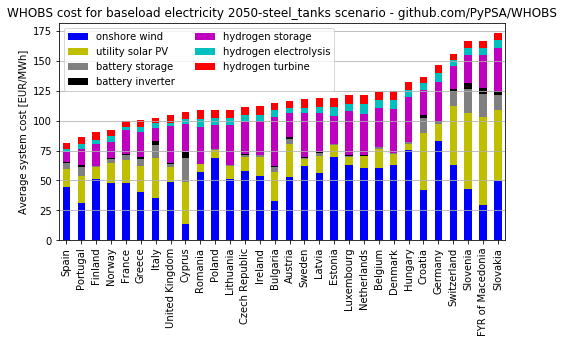

In [11]:
order = ["wind","solar","batt","charger","H2","elec","fc"]

rename = {"wind" : "onshore wind",
          "solar" : "utility solar PV",
          "batt" : "battery storage",
          "charger" : "battery inverter",
          "H2" : "hydrogen storage",
          "elec" : "hydrogen electrolysis",
          "fc" : "hydrogen turbine"}

rename = {"cost-"+k : v for k,v in rename.items()}

colours = {"wind" : "b",
           "solar" : "y",
           "batt" : "gray",
           "charger" : "k",
           "H2" : "m",
           "elec" : "c",
           "fc" : "r"
          }


fig,ax=plt.subplots()
fig.set_size_inches((8,4))

results.sort_values(by="cost",axis=1).rename(columns=code_to_country).loc[["cost-"+i for i in order]].T.rename(columns=rename).plot(kind="bar",stacked=True,
                                                 color=[colours[i] for i in order],
                                                                      ax=ax)
ax.legend(ncol=2,loc="upper left")

ax.set_xlabel("")

ax.grid(axis="y")

ax.set_ylabel("Average system cost [EUR/MWh]")

ax.set_title("WHOBS cost for baseload electricity {} scenario - github.com/PyPSA/WHOBS".format(scenario))

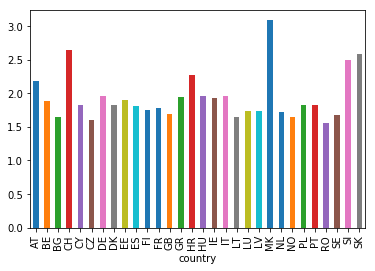

In [12]:
results.loc[["wsupply","ssupply"]].sum().plot(kind="bar")